# Part 2. Hierarchical Clustering

In this notebook, we will check how to apply hierarchical clustering algorithm to real life dataset. We will look into the tree constructed by the algorithm and check how to select the best number of clusters.

Dataset contains 4000 rows each representing each driver, the mean distance driven per day and the mean percentage of time a driver was >5 mph over the speed limit. We will try to group all of these drivers and check if they are some common behaviours between them.

![Delivery](assets/delivery_dataset.jpg)

## 1. Import everything we need

This time, we will use very similar libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

## 2. Look into the dataset

Before applying any algorithm to the dataset, it is worth to check what we have.

At the beginning, let's read our data using Pandas. Again, we will work with CSV file but this time its values are separated using tabs (`\t`). Also, we can use `Driver_ID` column as an index for our DataFrame.

In [7]:
DATASET_PATH = './datasets/deliveries.csv'
deliveries = pd.read_csv(DATASET_PATH, sep='\t', index_col='Driver_ID')
deliveries.head()

,Distance_Feature,Speeding_Feature
Driver_ID,,
3423311935,71.24,28.0
3423313212,52.53,25.0
3423313724,64.54,27.0
3423311373,55.69,22.0
3423310999,54.58,25.0


Again, we can check the size of our dataset.

In [4]:
deliveries.shape

(4000, 2)

## 3. Visualization

This time our dataset has only two features. It's worth to plot the data and check if we would be able to find dependencies between distance and speeding.

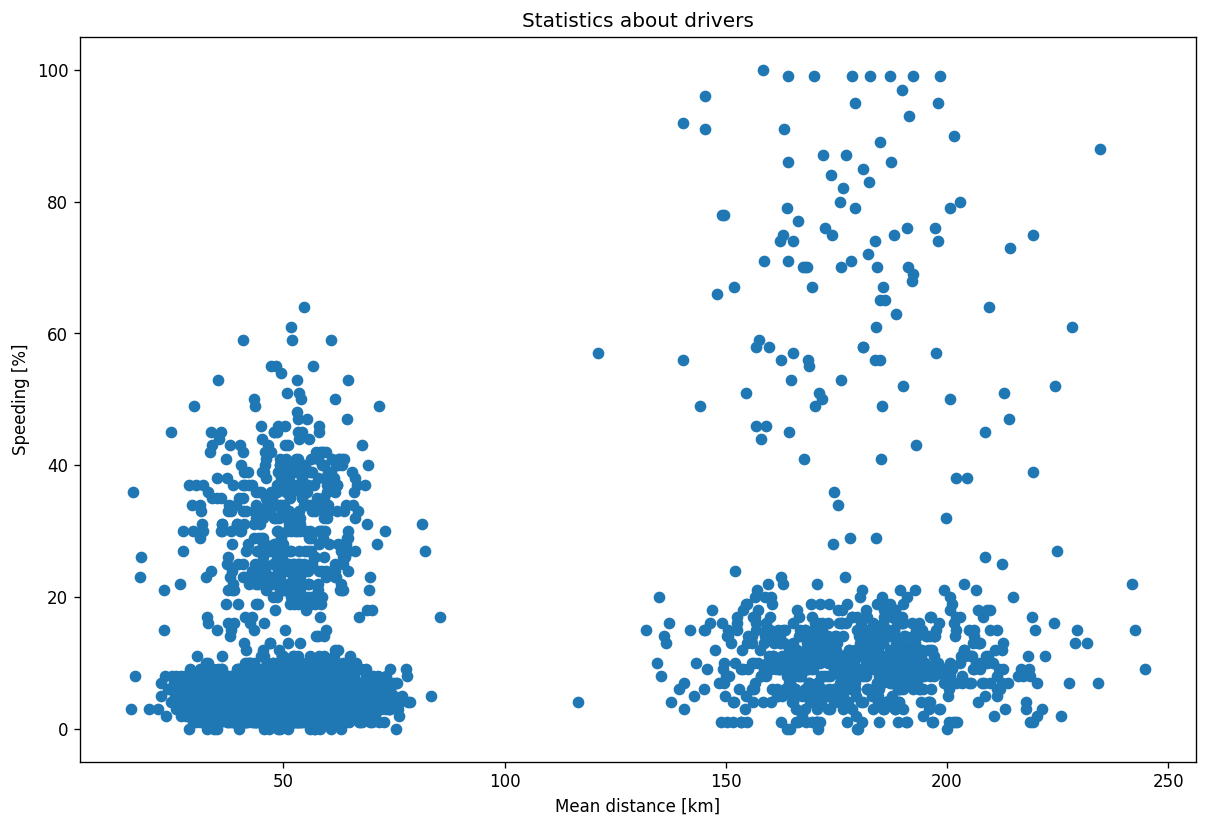

In [6]:
plt.figure(figsize=(12, 8), dpi=120)
plt.scatter(deliveries['Distance_Feature'], deliveries['Speeding_Feature'])
plt.title('Statistics about drivers')
plt.xlabel('Mean distance [km]')
plt.ylabel('Speeding [%]')
plt.show()

## 4. Dendrogram

Now, let's apply hierarchical clustering and draw a dendrogram for output tree. Then we will try to find a sweet spot for number of clusters that can describe this dataset.

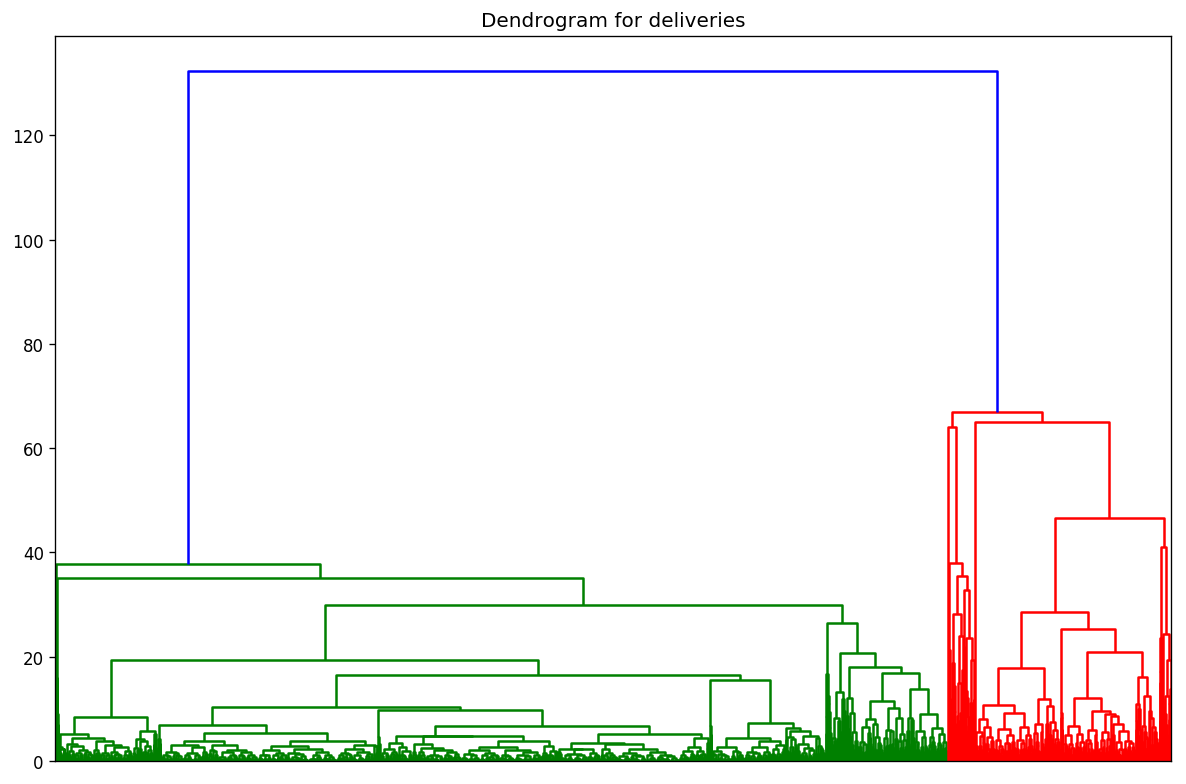

In [17]:
plt.figure(figsize=(12, 8), dpi=120)
linkage_matrix = hierarchy.average(deliveries)
hierarchy.dendrogram(linkage_matrix, no_labels=True)
plt.title('Dendrogram for deliveries')
plt.show()

Now, try to answer two very important questions:
 - How many clusters would be the best for this dataset?
 - Which threshold should we set?

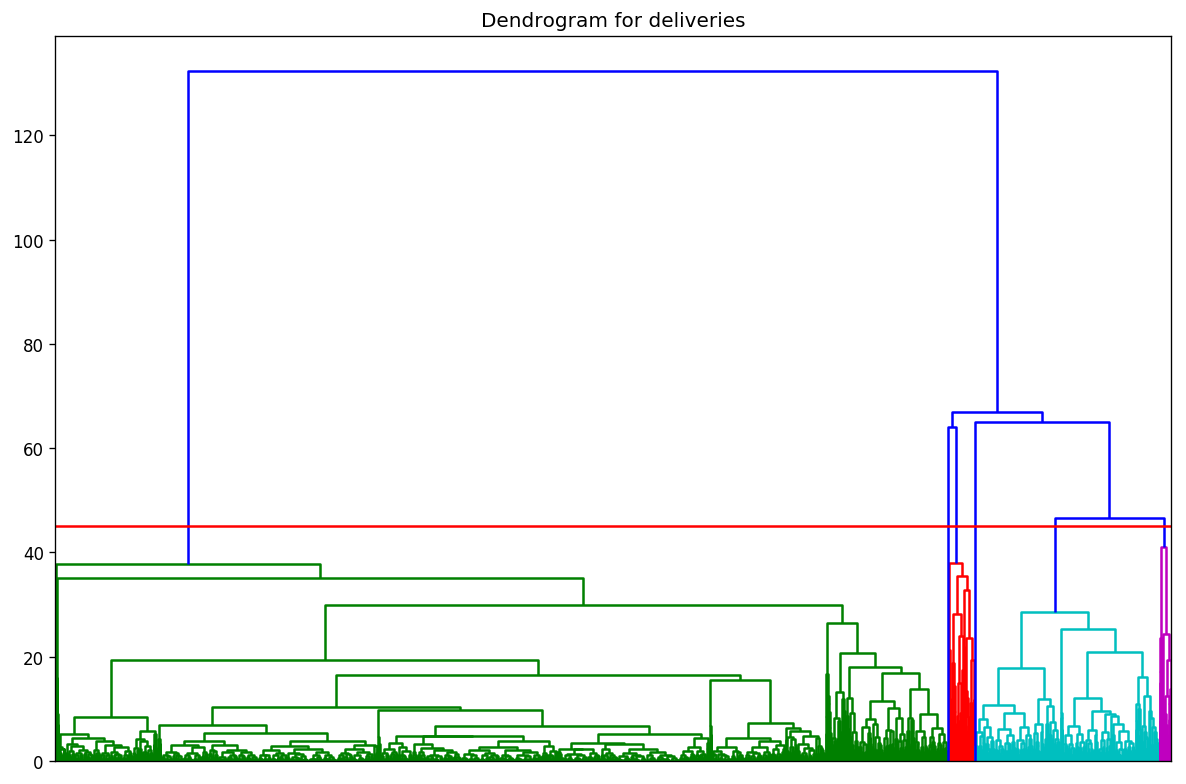

In [18]:
THRESHOLD = 45
plt.figure(figsize=(12, 8), dpi=120)
linkage_matrix = hierarchy.average(deliveries)
hierarchy.dendrogram(linkage_matrix, color_threshold=THRESHOLD, no_labels=True)
plt.axhline(y=THRESHOLD, color='red', linestyle='-')
plt.title('Dendrogram for deliveries')
plt.show()

## 5. Scikit Learn model

As we know how many clusters we should use, let's build a model using Scikit Learn. It should be very easy and very similar to the KMeans notebook.

Scikit Learn implementation is hidden behind `AgglomerativeClustering` class. We can pass many arguments to the constructor but the most important ones are `n_clusters` and `affinity` which we set to `euclidean` distance.

In [19]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')  
model.fit(deliveries)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func='deprecated')

## 6. Final visualization

Now we grouped our drivers into 4 clusters that are very similar. Let's visualize it one more time.

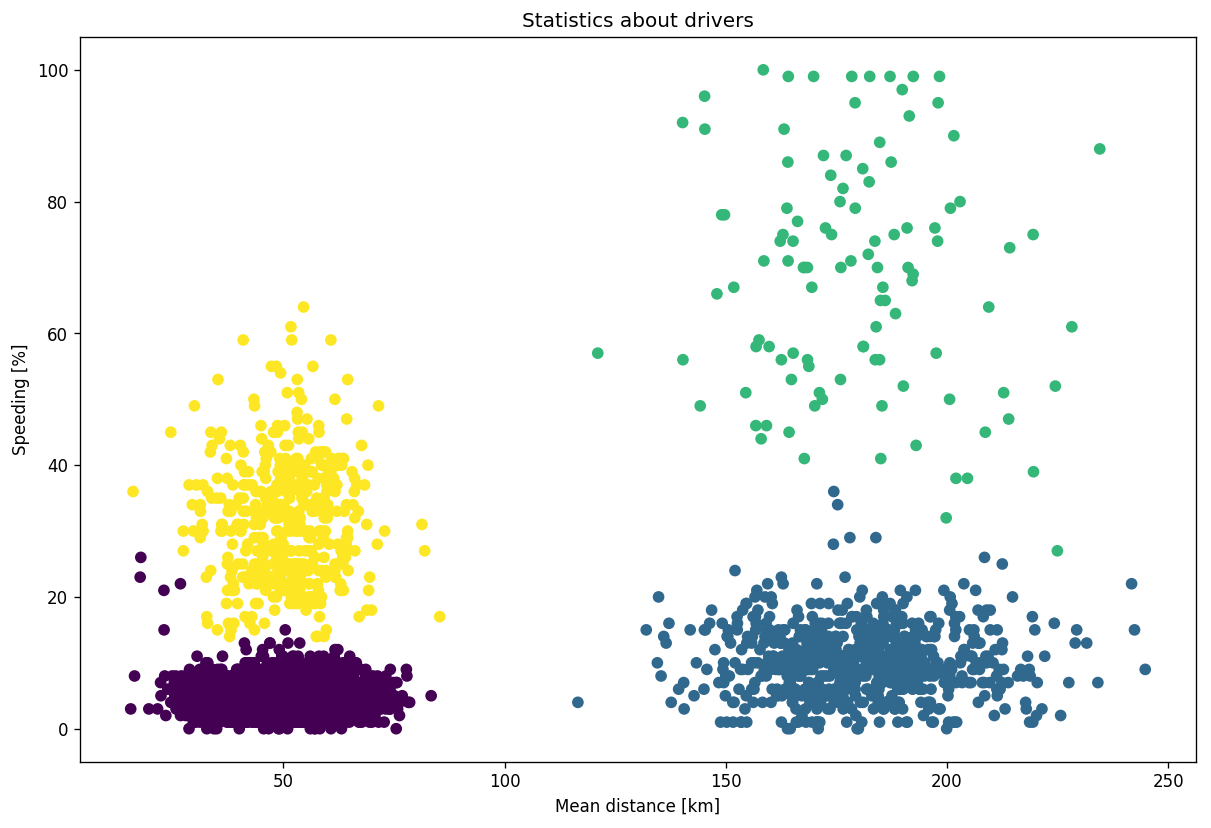

In [21]:
plt.figure(figsize=(12, 8), dpi=120)
plt.scatter(deliveries['Distance_Feature'], deliveries['Speeding_Feature'], c=model.labels_)
plt.title('Statistics about drivers')
plt.xlabel('Mean distance [km]')
plt.ylabel('Speeding [%]')
plt.show()